In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv"
df = pd.read_csv(url)

df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Data Selection and Cleaning: Load the dataset. Identify and handle missing values (e.g., imputation or removal) and address any obvious outliers in the chosen features.


In [131]:
# 4 check data set shape, data types and non-null counts
print("\nDataset shape:", df.shape)
print("\nData types and non-null counts:")
df.info()



Dataset shape: (21613, 21)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  in

In [132]:
# 5 Check for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# 6 Summary statistics for mumerical columns
df.describe()

In [133]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#7 Identify outliers in the chosen feature ('yr_built')


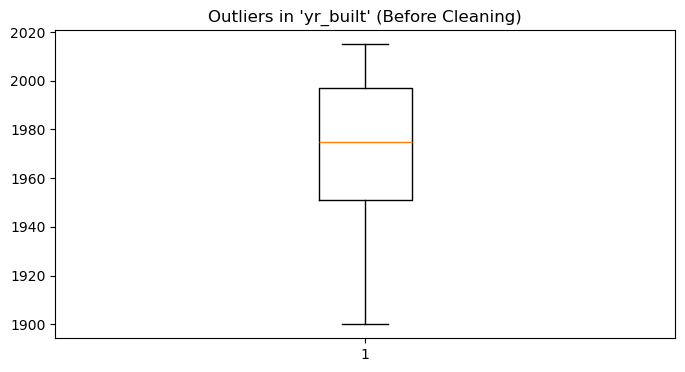

In [134]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['yr_built'])
plt.title("Outliers in 'yr_built' (Before Cleaning)")
plt.show()#

In [19]:
#8 Remove unrealistic construction years (before 1900)

In [135]:
df = df[df['yr_built'] >= 1900]

In [136]:
df['sale_year'] = pd.to_datetime(df['date'], format='%Y%m%dT000000').dt.year


In [137]:
df['house_age'] = df['sale_year'] - df['yr_built']

# Preview

In [138]:
df['effective_year_built'] = df[['yr_built', 'yr_renovated']].max(axis=1)
df['effective_house_age'] = df['sale_year'] - df['effective_year_built']

In [139]:
# 3️⃣ Create 'effective_house_age' accounting for renovations
df['effective_year_built'] = df[['yr_built', 'yr_renovated']].max(axis=1)
df['effective_house_age'] = df['sale_year'] - df['effective_year_built']


In [140]:
# List all columns in your current DataFrame
print(df.columns)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sale_year', 'house_age',
       'effective_year_built', 'effective_house_age'],
      dtype='object')


In [141]:
# Preview the first few rows
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,house_age,effective_year_built,effective_house_age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,59,1955,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,63,1991,23
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,82,1933,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014,49,1965,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,28,1987,28


In [142]:
# Create sale_year from the date
df['sale_year'] = pd.to_datetime(df['date'], format='%Y%m%dT000000').dt.year

# Create house_age
df['house_age'] = df['sale_year'] - df['yr_built']


In [143]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,house_age,effective_year_built,effective_house_age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,59,1955,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,63,1991,23
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,82,1933,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014,49,1965,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,28,1987,28


In [144]:
df['date'] = pd.to_datetime(df['date'])
df['sale_year'] = df['date'].dt.year
df['house_age'] = df['sale_year'] - df['yr_built']

In [145]:
# Split the data: 80% training, 20% testing
X = df[['house_age']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (17290, 1)
Testing set size: (4323, 1)


In [146]:
# Initialize the model
model = LinearRegression()


In [147]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [148]:
# Display the learned coefficients
print("Slope (coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

Slope (coefficient): -600.7272192056545
Intercept: 563727.5592150905


In [149]:
# Predict on the test set
y_pred = model.predict(X_test)

In [150]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

In [151]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

In [152]:
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 150625436499.70328
Root Mean Squared Error (RMSE): 388104.92975444574
R-squared (R²): 0.003646565326917983


# 3️⃣ Scatter plot + regression line

In [153]:
plt.figure(figsize=(8, 5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

# Scatter of actual test data

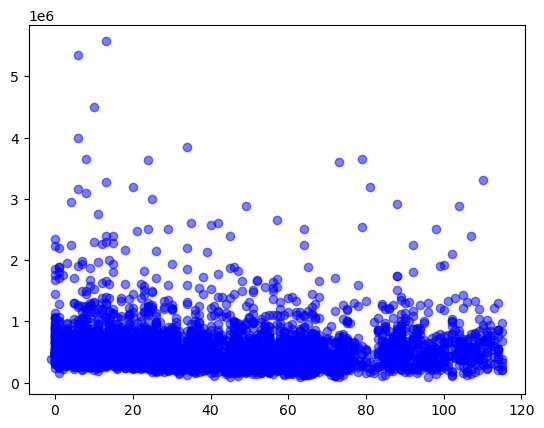

In [154]:
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Prices')

# Sort X_test for a smooth regression line

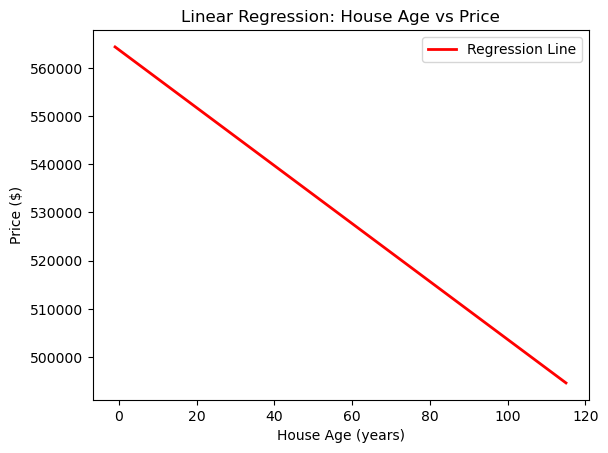

In [155]:
sorted_idx = X_test['house_age'].argsort()
plt.plot(
    X_test['house_age'].iloc[sorted_idx], 
    y_pred[sorted_idx], 
    color='red', linewidth=2, label='Regression Line'
)

plt.xlabel("House Age (years)")
plt.ylabel("Price ($)")
plt.title("Linear Regression: House Age vs Price")
plt.legend()  # Ensures legend appears without warning
plt.show()










In [126]:
# Create a small DataFrame for new test cases
test_data = pd.DataFrame({'house_age': [10, 50]})


In [127]:
# Predict using the trained model
predicted_prices = model.predict(test_data)


In [76]:
# Display results
for age, price in zip(test_data['house_age'], predicted_prices):
    print(f"Predicted price for a {age}-year-old house: ${price:,.2f}")

Predicted price for a 10-year-old house: $557,720.29
Predicted price for a 50-year-old house: $533,691.20


In [128]:
# Create a small DataFrame for new test cases
test_data = pd.DataFrame({'house_age': [20, 40]})

In [129]:
# Predict using the trained model
predicted_prices = model.predict(test_data)


In [79]:
# Display results
for age, price in zip(test_data['house_age'], predicted_prices):
    print(f"Predicted price for a {age}-year-old house: ${price:,.2f}")

Predicted price for a 20-year-old house: $551,713.01
Predicted price for a 40-year-old house: $539,698.47
